In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import data and quick look

In [2]:
# read raw data into dataframe

df_train_scale = pd.read_csv('round2_train_data.csv')
df_test_scale = pd.read_csv('round2_test_data.csv')

df_train_no = pd.read_csv('round2_train_no_scale.csv')
df_test_no = pd.read_csv('round2_test_no_scale.csv')

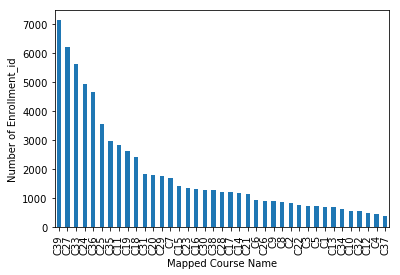

In [10]:
df_train_no['course'].value_counts().plot(kind = 'bar')
plt.xlabel('Mapped Course Name')
plt.ylabel('Number of Enrollment_id')

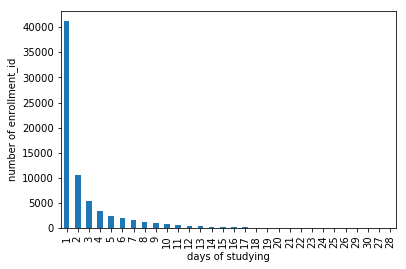

In [4]:
df_train_no['number of days'].value_counts().plot(kind = 'bar')
plt.xlabel('days of studying')
plt.ylabel('number of enrollment_id')

In [5]:
df_train_no.head()

,number of days,working time interval,access,discussion,navigate,page_close,problem,video,wiki,AA,...,GG,A,B,C,D,E,F,G,course,target
0,1,143.000000,7,6,6,4,0,2,2,21,...,1,18.0,73.0,23.0,26.0,0.0,1.0,2.0,C6,1.0
1,1,2250.000000,25,0,3,8,16,20,0,300,...,0,24.0,0.0,87.0,173.0,117.0,1849.0,0.0,C19,1.0
2,3,2569.333333,33,3,10,10,0,11,1,202,...,0,256.0,28.0,3282.0,3115.0,0.0,1023.0,4.0,C20,1.0
3,1,98.000000,2,0,2,1,0,0,0,1,...,0,39.0,0.0,59.0,0.0,0.0,0.0,0.0,C8,1.0
4,1,530.000000,3,0,2,1,0,1,0,3,...,0,360.0,0.0,170.0,0.0,0.0,0.0,0.0,C11,1.0


#  Cluster
### check if clustering is helpful to detect outliers

In [28]:
# take course C39 as an example to cluster such that outlier within this cluster is labeled
df_C39 = df_train_no[df_train_no['course'] == 'C39'].drop(labels = ['course', 'target'], axis = 1)

In [39]:
# DBSCAN on this course

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

df_C39_scale = StandardScaler().fit_transform(df_C39)
db = DBSCAN(eps = 1, min_samples = 10).fit(df_C39_scale)
core_sample_mask = np.zeros_like(db.labels_, dtype = bool)
core_sample_mask[db.core_sample_indices_] = True
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)


In [40]:
# check the outlier points' behavior

count = 0
for value in labels:
    if value == -1:
        count += 1
    else:
        pass
print count

2872


In [48]:
# add cluster label in dataframe

df_C39_cluster = df_train_no[df_train_no['course'] == 'C39']
df_C39_cluster['cluster'] = labels

df_C39_cluster.head()

/Users/chengqiaowang/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,number of days,working time interval,access,discussion,navigate,page_close,problem,video,wiki,AA,...,A,B,C,D,E,F,G,course,target,cluster
15,1,6339.0,19,15,15,9,2,4,4,171,...,1094.0,664.0,506.0,4010.0,39.0,4.0,22.0,C39,1.0,-1
27,2,956.0,5,0,1,4,5,3,0,10,...,11.0,0.0,0.0,798.0,112.0,991.0,0.0,C39,1.0,0
38,1,1512.0,3,4,7,1,0,1,2,3,...,1279.0,87.0,53.0,82.0,0.0,0.0,11.0,C39,1.0,0
44,1,1644.0,9,5,6,1,3,3,1,36,...,607.0,441.0,72.0,34.0,24.0,462.0,4.0,C39,1.0,0
46,3,3723.0,8,0,5,5,0,3,0,7,...,29.0,0.0,1913.0,9227.0,0.0,0.0,0.0,C39,1.0,0


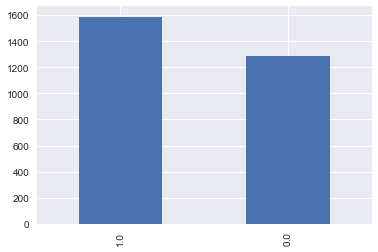

In [56]:
# check 

check = df_C39_cluster[df_C39_cluster['cluster'] == -1]
check['target'].value_counts().plot(kind = 'bar')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x118e8aa50>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11973fe10>], dtype=object)

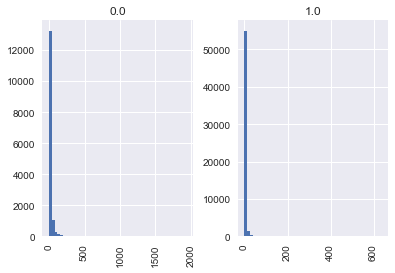

In [14]:
df_train_no.hist(column='discussion', bins = 50, by = 'target')

# Correlation comparison --> whole dataframe vs. course based

In [15]:
# try add up feature with similar physical meanings

df_train_no['test add'] =  df_train_no['AC'] + df_train_no['CA']

In [16]:
# create correlation dataframe --> convert to ndarray

corr_df = df_train_no.corr()
corr_C39 = df_train_no[df_train_no['course'] == 'C39'].corr()

corr_df_target = pd.DataFrame(corr_df['target'])
corr_C39_target = pd.DataFrame(corr_C39['target'])

corr_array = np.asarray(corr_df['target'])
corr_C39_array = np.asarray(corr_C39['target'])

In [76]:
# compare two correlations to find the largest one

corr_arr_sort = np.sort(corr_array)
print corr_arr_sort[:10]
#print corr_arr_sort[-5:]

corr_C39_arr_sort = np.sort(corr_C39_array)
print corr_C39_arr_sort[:10]
#print corr_C39_arr_sort[-5:]

[-0.56247623 -0.49037976 -0.46688672 -0.46033863 -0.41964373 -0.34003434
 -0.33700274 -0.33032178 -0.32938813 -0.32785805]
[-0.54058042 -0.53070909 -0.52792799 -0.47901468 -0.47640097 -0.39509127
 -0.37566009 -0.37119842 -0.35442172 -0.33966554]


## Feature Selection

In [17]:
# find the best features for modeling

feature = corr_df_target.loc[corr_df_target['target'] < -0.28]
print feature

                  target
number of days -0.562476
access         -0.460339
navigate       -0.466887
page_close     -0.490380
problem        -0.330322
video          -0.419644
AC             -0.283093
CA             -0.302112
AD             -0.327858
CD             -0.329388
CF             -0.291630
DD             -0.337003
DF             -0.294985
FD             -0.302720
A              -0.308547
D              -0.340034
F              -0.281583
test add       -0.304052


# Split dataset based on Course

In [6]:
# select features in advance

df_train_no = df_train_no[['number of days', 'access','navigate','page_close', 'video', 'D', 'course', 'target']]
df_test_no = df_test_no[['number of days', 'access','navigate','page_close', 'video', 'D', 'course']]

In [7]:
# create a for loop to divide dataset, scale for each subset
from sklearn.preprocessing import StandardScaler

train_data_list = []
train_target_list = []
pred_data_list = []
pred_label_list = []

c = 'C'

df_test_no['id'] = np.array(xrange(72326, 120543, 1))

for i in xrange(1,40):
    label = c + str(i)
    
    # create each training subset
    train_subset = df_train_no[df_train_no['course'] == label].drop(labels = ['course','target'], axis = 1)
    X_target = df_train_no[df_train_no['course'] == label]
    target = X_target['target']
    
    # create each prediction subset with enrollment_id appended
    pred = df_test_no[df_test_no['course'] == label]
    pred_subset = pred.drop(labels = ['course','id'], axis = 1)
    pred_label = pred['id']
    
    # transform the data by standard scaler
    X = StandardScaler().fit_transform(train_subset)
    Y = StandardScaler().fit_transform(pred_subset)
    
    # store df in list
    train_data_list.append(X)
    train_target_list.append(target)
    
    pred_data_list.append(Y)
    pred_label_list.append( list(pred_label) )


# Split dataset for each subset, training and predicting

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

### Logistic Regression

In [9]:
# split and train the model

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr_tuned_parameter = {'penalty': ['l1', 'l2'], 'C': [0.01, 0.05, 0.1, 0.2, 0.3, 0.5]}
lr_parameters = []
result_list = []

for i in range(39):
    X_train, X_test, y_train, y_test = train_test_split(train_data_list[i], train_target_list[i], 
                                                       test_size = 0.30, random_state = 101)
    
    lr_clf = GridSearchCV(lr, lr_tuned_parameter, scoring = 'neg_log_loss')
    lr_clf.fit(X_train, y_train)
    lr_parameters.append(lr_clf.best_params_)
    
    lr_pred = lr_clf.predict_proba(pred_data_list[i])
    result_array = zip(list(pred_label_list[i]), list(lr_pred[:,1]))
    result_list.append(result_array)
    

In [10]:
# create output dataframe from subset array

df_result = pd.DataFrame(columns=['enrollment_id', 'dropout_prob'])

for i in xrange(39):
    df_result = df_result.append(result_list[i])
    
df_output = df_result.drop(labels = ['enrollment_id', 'dropout_prob'], axis = 1)
df_output.rename(index=str, columns={0: "enrollment_id", 1: "dropout_prob"}, inplace = True)
df_output[['enrollment_id']] = df_output[['enrollment_id']].astype(int)

df_output.to_csv('LR_subset_features.csv', index = False)

### Neural Network

In [9]:
# split and train the model

from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()
mlp_tuned_parameter = {'hidden_layer_sizes': [(100,), (150,)], 'alpha': [0.00005, 0.0001, 0.0002]}
mlp_parameters = []
mlp_result_list = []

for i in range(39):
    X_train, X_test, y_train, y_test = train_test_split(train_data_list[i], train_target_list[i], 
                                                       test_size = 0.30, random_state = 101)
    
    mlp_clf = GridSearchCV(mlp, mlp_tuned_parameter, scoring = 'neg_log_loss')
    mlp_clf.fit(X_train, y_train)
    mlp_parameters.append(mlp_clf.best_params_)
    
    mlp_pred = mlp_clf.predict_proba(pred_data_list[i])
    result_array = zip(list(pred_label_list[i]), list(mlp_pred[:,1]))
    mlp_result_list.append(result_array)
    

/Users/chengqiaowang/anaconda/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


In [10]:
# create output dataframe from subset array

df_result_mlp = pd.DataFrame(columns=['enrollment_id', 'dropout_prob'])

for i in xrange(39):
    df_result_mlp = df_result_mlp.append(mlp_result_list[i])
    
df_mlp = df_result_mlp.drop(labels = ['enrollment_id', 'dropout_prob'], axis = 1)
df_mlp.rename(index=str, columns={0: "enrollment_id", 1: "dropout_prob"}, inplace = True)
df_mlp[['enrollment_id']] = df_mlp[['enrollment_id']].astype(int)

df_mlp.to_csv('MLP_subset_features.csv', index = False)

# Use the whole dataset with previously scaled

### Get dummy variables

In [6]:
df_train_scale_dummy = pd.get_dummies(df_train_scale)
df_test_scale_dummy = pd.get_dummies(df_test_scale)

## Split dataset

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

train = df_train_scale_dummy[['number of days', 'access','navigate','page_close', 'video', 'D']]
test = df_test_scale_dummy[['number of days', 'access','navigate','page_close', 'video', 'D']]
target = df_train_scale_dummy['target']

X_train_scale, X_test_scale, y_train_scale, y_test_scale = train_test_split(train, target, 
                                                                            test_size = 0.30, random_state = 101)

### Logistic Regression

In [8]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr_tuned_parameter = {'penalty': ['l1', 'l2'], 'C': [0.1, 0.3, 0.5, 1.0]}
scores = ['neg_log_loss']

for score in scores:
    print "Tuning hyperparameter for %s" % score
    print ' '
    
    lr_clf = GridSearchCV(lr, lr_tuned_parameter, scoring = 'neg_log_loss')
    lr_clf.fit(X_train_scale, y_train_scale)
    
    print "Best parameters set found on development set:"
    print lr_clf.best_params_
    
    lr_y_true, lr_y_pred = y_test_scale, lr_clf.predict(X_test_scale)
    
    print classification_report(lr_y_true, lr_y_pred)
    print ' '
    
    prediction = lr_clf.predict_proba(test)

Tuning hyperparameter for neg_log_loss
 
Best parameters set found on development set:
{'penalty': 'l2', 'C': 0.1}
             precision    recall  f1-score   support

        0.0       0.75      0.43      0.54      4483
        1.0       0.87      0.96      0.91     17215

avg / total       0.84      0.85      0.84     21698

 


In [9]:
# Output prediction result based on GridSearchCV

label_list = np.array(xrange(72326, 120543, 1))
result_array = zip(list(label_list), list(prediction[:,1]))

df_result_lr = pd.DataFrame(result_array, columns=['enrollment_id', 'dropout_prob'])
df_result_lr.to_csv('LR_features.csv', index = False)

### Neural Network

In [93]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()

mlp_tuned_parameter = {'hidden_layer_sizes': [(100,), (150,)], 'alpha': [0.00005, 0.0001, 0.0002]}
scores = ['neg_log_loss']

for score in scores:
    print "Tuning hyperparameter for %s" % score
    print ' '
    
    mlp_clf = GridSearchCV(mlp, mlp_tuned_parameter, scoring = 'neg_log_loss')
    mlp_clf.fit(X_train_scale, y_train_scale)
    
    print "Best parameters set found on development set:"
    print mlp_clf.best_params_
    
    mlp_y_true, mlp_y_pred = y_test_scale, mlp_clf.predict(X_test_scale)
    
    print classification_report(mlp_y_true, mlp_y_pred)
    print ' '
    
    prediction_mlp = mlp_clf.predict_proba(test)

Tuning hyperparameter for neg_log_loss
 
Best parameters set found on development set:
{'alpha': 0.0001, 'hidden_layer_sizes': (150,)}
             precision    recall  f1-score   support

        0.0       0.71      0.50      0.59      4483
        1.0       0.88      0.95      0.91     17215

avg / total       0.84      0.86      0.84     21698

 


In [94]:
# output result based on GridSearchCV

label_list = np.array(xrange(72326, 120543, 1))
result_array = zip(list(label_list), list(prediction_mlp[:,1]))

df_result_mlp_para = pd.DataFrame(result_array, columns=['enrollment_id', 'dropout_prob'])
df_result_mlp_para.to_csv('MLP_scale_6features.csv', index = False)

### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
tuned_parameter = {'n_estimators': [50,100,150]}
score = 'precision'

print "Tuning hyperparameter for neg_log_loss"

clf = GridSearchCV(rfc, tuned_parameter, cv=5, scoring = 'neg_log_loss')
clf.fit(X_train_scale, y_train_scale)

print "Best parameters set found on development set:"
print clf.best_params_

y_true, y_pred = y_test, clf.predict(X_test_scale)
print classification_report(y_true, y_pred)

In [ ]:
# rebuild the model with best parameters

rfc_final = RandomForestClassifier(n_estimators = 150 )
rfc_final.fit(X_train_scale, y_train_scale)

prediction_rfc_proba = rfc_final.predict_proba(test)

In [ ]:
# output the probability result

label_list = np.array(xrange(72326, 120543, 1))
result_array = zip(list(label_list), list(prediction_rfc_proba[:,1]))
df_result = pd.DataFrame(result_array, columns=['enrollment_id', 'dropout_prob'])
df_result.to_csv('All_features_proba.csv', index = False)

### Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators = 150)
rfr.fit(X_train_scale, y_train_scale)

rfr_pred = rfr.predict(test)

label_list = np.array(xrange(72326, 120543, 1))
rfr_result = zip(list(label_list), list(rfr_pred))
df_rfr_result = pd.DataFrame(rfr_result, columns=['enrollment_id', 'dropout_prob'])
df_rfr_result.to_csv('rfr_selected_feature.csv', index = False)